=== DATA INFO ===
Total rows: 5884
Date range: 2021-01-07 00:00:00 to 2022-12-08 00:00:00
Categories to filter: ['Beauty & Grooming', 'Health & Sports', 'Superstore', 'Kids & Baby', 'Soghaat', 'Others']
Using category column: category
Rows after category filter: 2408

=== DATA REALITY CHECK ===
SUM after_discount: 5881 to 78760 rb
CTD customer_id: 0.0 to 0.2 rb
AVG after_discount: 180.3 to 784.1 rb


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15392\2426019892.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_ticks = pd.date_range(start=start_date, end=end_date, freq='2M')


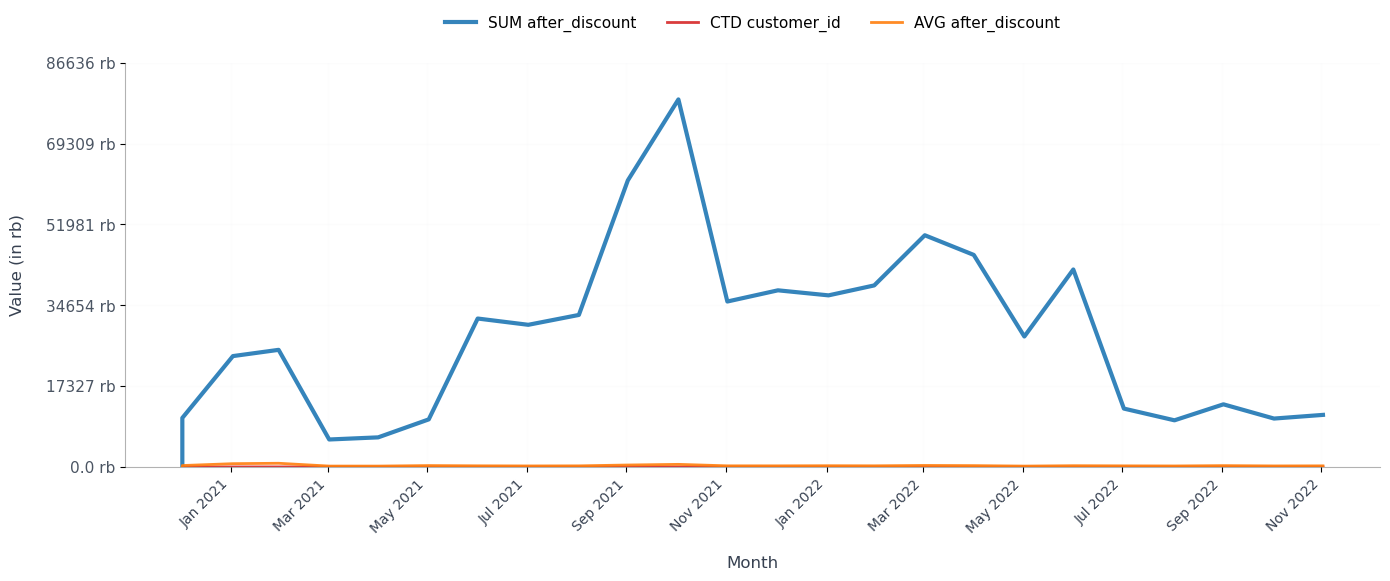

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

df = pd.read_csv('Copy of finalProj_df - df.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

print("=== DATA INFO ===")
print(f"Total rows: {len(df)}")
print(f"Date range: {df['order_date'].min()} to {df['order_date'].max()}")

categories = ['Beauty & Grooming', 'Health & Sports', 'Superstore', 'Kids & Baby', 'Soghaat', 'Others']
print(f"Categories to filter: {categories}")

category_column = None
for col in ['category', 'categories', 'Category', 'product_category']:
    if col in df.columns:
        category_column = col
        break

if category_column:
    print(f"Using category column: {category_column}")
    df = df[df[category_column].isin(categories)]
    print(f"Rows after category filter: {len(df)}")

df['year_month'] = df['order_date'].dt.to_period('M')
monthly_metrics = df.groupby('year_month').agg({
    'after_discount': ['sum', 'mean'],  
    'customer_id': 'nunique'           
}).reset_index()

monthly_metrics.columns = ['year_month', 'sum_after_discount', 'avg_after_discount', 'ctd_customer_id']

monthly_metrics['sum_sales_rb'] = monthly_metrics['sum_after_discount'] / 1000  # ke ribu
monthly_metrics['ctd_customer_rb'] = monthly_metrics['ctd_customer_id'] / 1000  # ke ribu
monthly_metrics['avg_sales_rb'] = monthly_metrics['avg_after_discount'] / 1000  # ke ribu

monthly_metrics['year_month'] = monthly_metrics['year_month'].dt.to_timestamp()
monthly_metrics = monthly_metrics.sort_values('year_month')

print(f"\n=== DATA REALITY CHECK ===")
print(f"SUM after_discount: {monthly_metrics['sum_sales_rb'].min():.0f} to {monthly_metrics['sum_sales_rb'].max():.0f} rb")
print(f"CTD customer_id: {monthly_metrics['ctd_customer_rb'].min():.1f} to {monthly_metrics['ctd_customer_rb'].max():.1f} rb")
print(f"AVG after_discount: {monthly_metrics['avg_sales_rb'].min():.1f} to {monthly_metrics['avg_sales_rb'].max():.1f} rb")

fig, ax = plt.subplots(figsize=(14, 6))

colors = ['#1f77b4', '#d62728', '#ff7f0e'] 

first_date = monthly_metrics['year_month'].iloc[0]
plot_dates = [first_date] + monthly_metrics['year_month'].tolist()

sum_data = [0] + monthly_metrics['sum_sales_rb'].tolist()
ax.plot(plot_dates, sum_data, 
        color=colors[0], linewidth=3, label='SUM after_discount', alpha=0.9)

ctd_data = [0] + monthly_metrics['ctd_customer_rb'].tolist()
ax.plot(plot_dates, ctd_data, 
        color=colors[1], linewidth=2, label='CTD customer_id', alpha=0.9)

avg_data = [0] + monthly_metrics['avg_sales_rb'].tolist()
ax.plot(plot_dates, avg_data, 
        color=colors[2], linewidth=2, label='AVG after_discount', alpha=0.9)

ax.set_ylim(bottom=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

max_value = max(monthly_metrics['sum_sales_rb'].max(), 
                monthly_metrics['ctd_customer_rb'].max(), 
                monthly_metrics['avg_sales_rb'].max())

yticks = np.linspace(0, max_value * 1.1, 6)

ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(y)} rb' if y >= 100 else f'{y:.1f} rb' for y in yticks], 
                  fontsize=11, color='#4B5563')

ax.set_ylabel('Value (in rb)', fontsize=12, color='#374151', labelpad=15)

start_date = monthly_metrics['year_month'].min()
end_date = monthly_metrics['year_month'].max()

if len(monthly_metrics) <= 12:
    date_ticks = pd.date_range(start=start_date, end=end_date, freq='1M')
else:
    date_ticks = pd.date_range(start=start_date, end=end_date, freq='2M')

ax.set_xticks(date_ticks)
ax.set_xticklabels([d.strftime('%b %Y') for d in date_ticks], 
                   fontsize=10, color='#374151', rotation=45, ha='right')

ax.set_xlabel('Month', fontsize=12, color='#374151', labelpad=15)

ax.legend(frameon=False, fontsize=11, loc='upper center', 
          bbox_to_anchor=(0.5, 1.15),
          ncol=3,
          handlelength=2, handletextpad=0.8, columnspacing=2)

ax.grid(True, axis='y', alpha=0.1, color='#E5E7EB', linestyle='-')
ax.grid(True, axis='x', alpha=0.05, color='#E5E7EB', linestyle='-')

plt.tight_layout()
plt.savefig('monthly_trends_fixed.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()